In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape, test_labels.shape

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

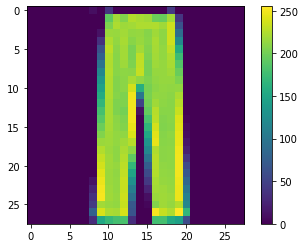

In [14]:
plt.figure()
plt.imshow(train_images[143])
plt.colorbar()
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

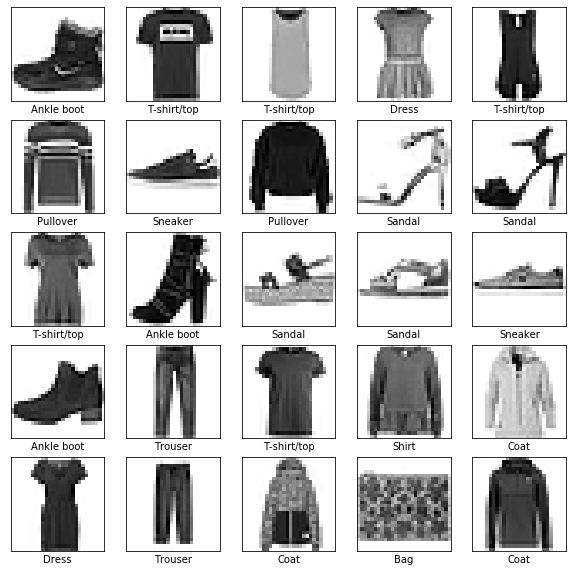

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

W0531 14:02:25.941463 139945077299008 deprecation.py:323] From /home/assassin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5009 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3755 - accuracy: 0.8646
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3341 - accuracy: 0.8786
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3114 - accuracy: 0.8859
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2939 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2810 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2691 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2580 - accuracy: 0.9053
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2473 - accuracy: 0.9073
Epoch 10/10
60

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3528 - accuracy: 0.8750
Test accuracy 0.875


### Save the Model

In [127]:
model.save('model.h5')

### Load the Model

In [ ]:
model = keras.models.load_model('model.h5')

# Predictions

In [21]:
predictions = model.predict(test_images)
predictions[3]

array([1.07904272e-08, 9.99994278e-01, 5.05940072e-08, 5.59866021e-06,
       1.08439266e-08, 9.62464090e-14, 2.12195168e-08, 5.40505856e-20,
       8.13881774e-12, 1.06154895e-14], dtype=float32)

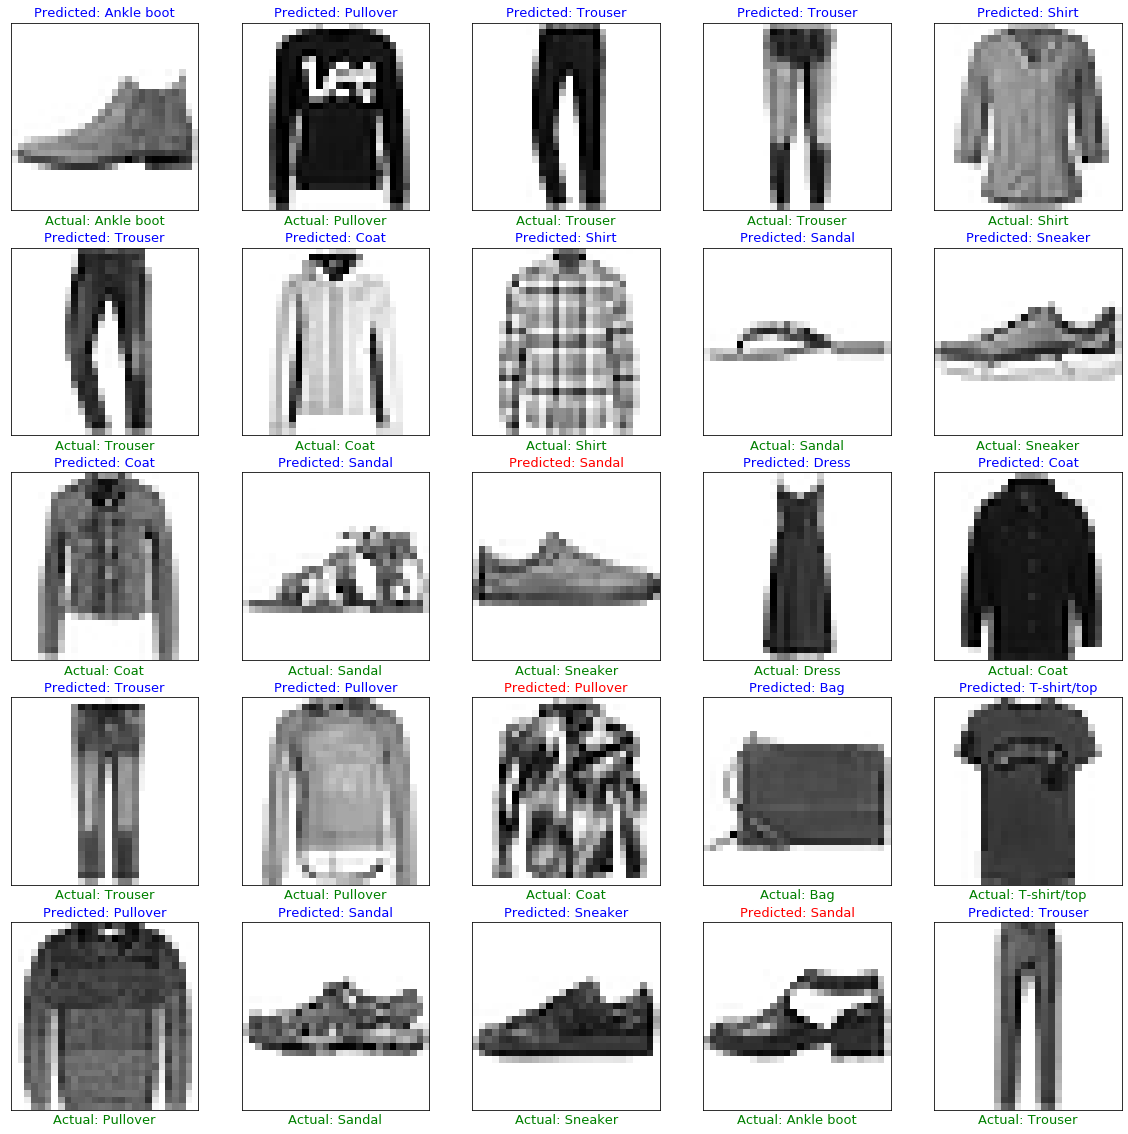

In [142]:
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Actual: ' + class_names[test_labels[i]], fontsize=13, color='green')
    color = 'blue' if test_labels[i] == np.argmax(predictions[i]) else 'red'
    plt.title('Predicted: ' + class_names[np.argmax(predictions[i])], fontsize=13, color=color)
plt.show()

In [111]:
def plot_image(i):
    predictions_array, true_label, img = predictions[i], test_labels[i], test_images[i]
    # predict a single image
    # predictions_array = model.predict(np.expand_dims(test_images[i], axis=0))[0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f'{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})'
               , color=color, fontsize=13)

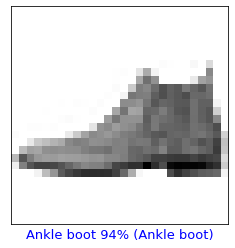

In [112]:
plot_image(0)
plt.show()

In [123]:
def plot_value_array(i, show_xticks=True):
    predictions_array, true_label = predictions[i], test_labels[i]
    # predict a single image
    # predictions_array = model.predict(np.expand_dims(test_images[i], axis=0))[0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    if show_xticks:
        plt.xticks(range(10), class_names, rotation=45)
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

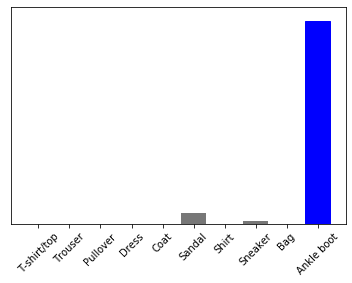

In [124]:
plot_value_array(0)
plt.show()

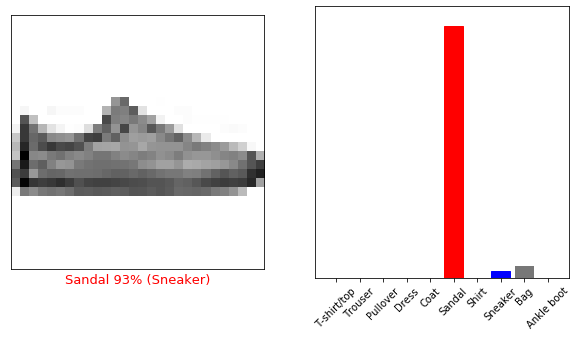

In [121]:
i = 12
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(i)
plt.subplot(1, 2, 2)
plot_value_array(i)
plt.show()

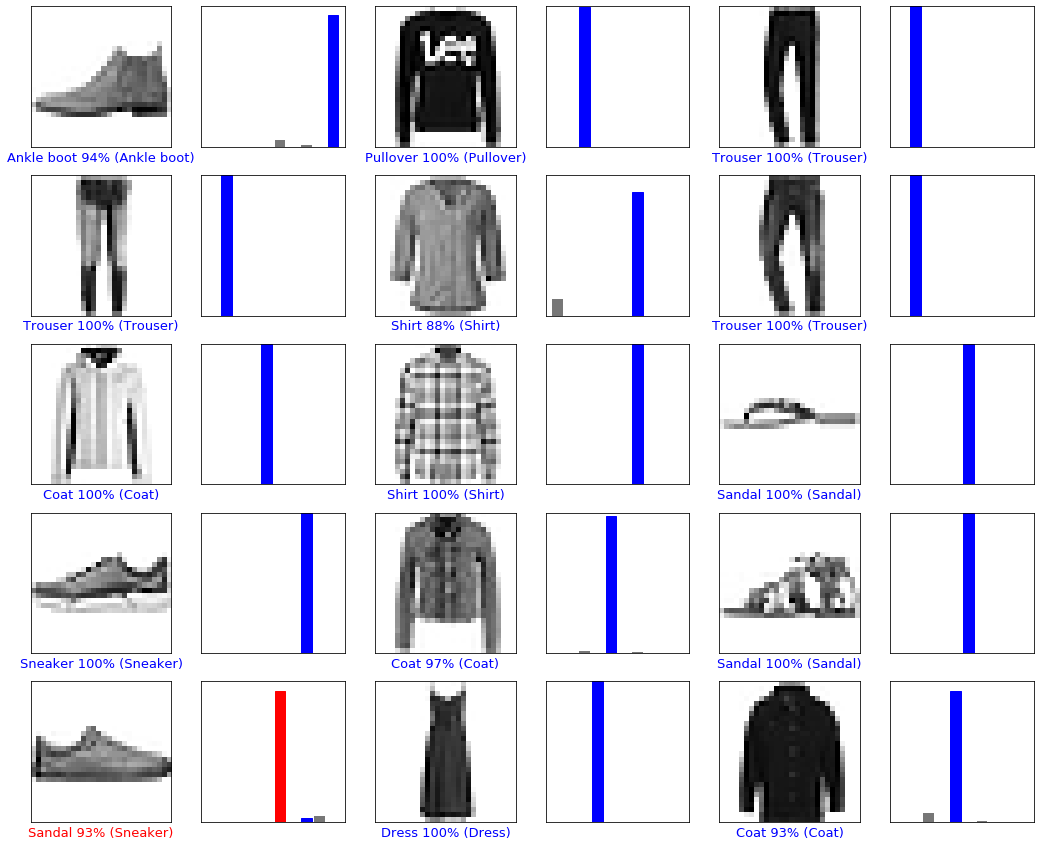

In [131]:
rows, cols = 5, 3
plt.figure(figsize=(3*2*cols, 3*rows))
for i in range(rows*cols):
    plt.subplot(rows, 2*cols, 2*i+1)
    plot_image(i)
    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(i, show_xticks=False)
plt.show()